In [1]:
from DiabetesModels import *

# Parameters for simulation
environment = read_env(ndim=3)

# Setup simulation from env dict
simulation = Simulation(environment._asdict())
# Get idea of paars to change
environment

# Turn notebook into script
# !jupyter nbconvert --to script config_template.ipynb


KeyboardInterrupt: 

In [ ]:
!jupyter nbconvert --to script run_num_3D.ipynb

[NbConvertApp] Converting notebook run_num_3D.ipynb to script
[NbConvertApp] Writing 1593 bytes to run_num_3D.py


In [ ]:
# Change parameters of simulation here if you want to
# look above!
# simulation.par = xxx
# simulation.patientNr = 2
simulation.nMeals = 20
simulation.loss_fun = 'CGP'
simulation.hypoglycemia = 5.0
simulation.target = 5.0
## Initiate simulation for patient

# print environment for debugging purposes
simulation_tuple = namedtuple('debug_tuple', simulation.__dict__)
print(simulation_tuple(**simulation.__dict__))

debug_tuple(path='debug/', maxPatient=1000, patientNr=2, path_to_simulations='simulations/', nMeals=20, ndim=3, loss_fun='CGP', jupyter=True, hypoglycemia=5.0, target=5.0, patient_filter=True)


In [ ]:
### Init patient
simulation.init_patient()
simulation.patient.set_u_opt()

In [ ]:
def bolus_fun_num_opt(Meal, simulation):

    Meal = np.array([Meal.squeeze()])

    simulation.patient.calculate_u_opt(u_opt_meal_range=Meal, x0 = simulation.patient.xEnd)
    bolus = simulation.patient.u_opt[0]

    return bolus


In [ ]:
### Do simulation
simulation.simulate(simulation.simulate_meals, bolus_fun = bolus_fun_num_opt)

Simulating for PatientNr: 2: 100%|██████████| 20/20 [02:01<00:00,  6.06s/it]


No handles with labels found to put in legend.


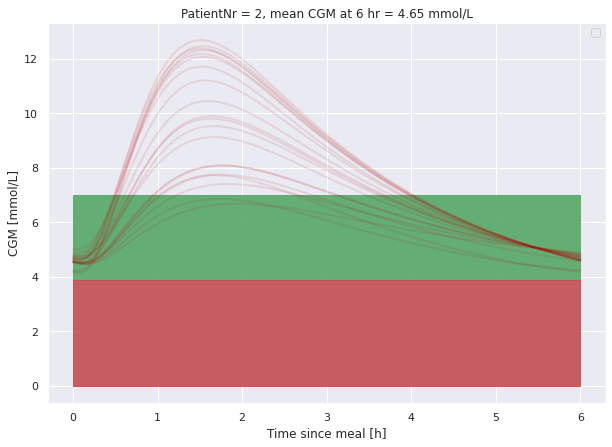

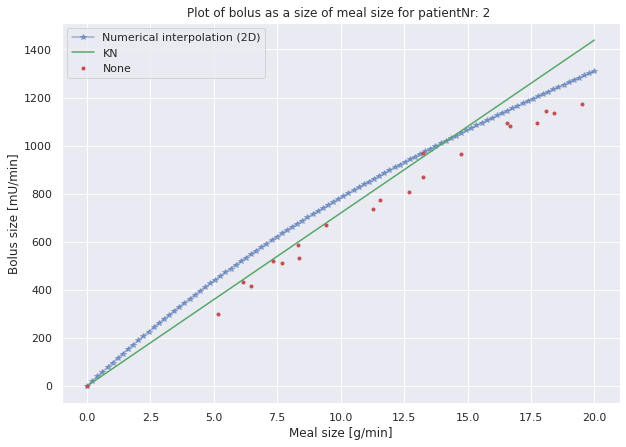

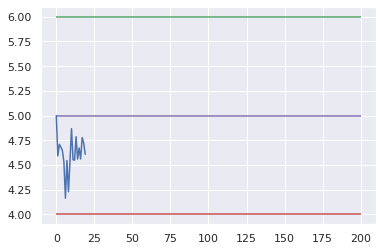

4.614857284622491 87.98611111111111 0.0


In [7]:
if simulation.jupyter:
    simulation.patient.set_u_opt()
    simulation.plot_CGM()
    simulation.make_u_opt_plot()

    plt.figure()
    plt.plot(simulation.nBG0)
    plt.hlines(6,0,200,'g')
    plt.hlines(5,0,200,'m')
    plt.hlines(4,0,200,'r')
    plt.show()

    print(simulation.nBG0.mean(),simulation.nTIR.mean(), simulation.nTBR.mean())
    

NameError: name 'plt' is not defined